## 1. Import, Load Data.

In [1]:
# Standart import 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Sklearn import
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, plot_roc_curve

In [2]:
sns.set()

In [3]:
gender_df = pd.read_csv("gender.csv")

## 2. Exploratory Data Analysis.

In [4]:
# First five rows
gender_df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [5]:
gender_df.columns = ["color", "music", "beverage", "drink", "gender"]
gender_df

,color,music,beverage,drink,gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [6]:
# Shape of the data
gender_df.shape

(66, 5)

In [7]:
# Information about the data
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   color     66 non-null     object
 1   music     66 non-null     object
 2   beverage  66 non-null     object
 3   drink     66 non-null     object
 4   gender    66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [8]:
# Types
gender_df.dtypes

color       object
music       object
beverage    object
drink       object
gender      object
dtype: object

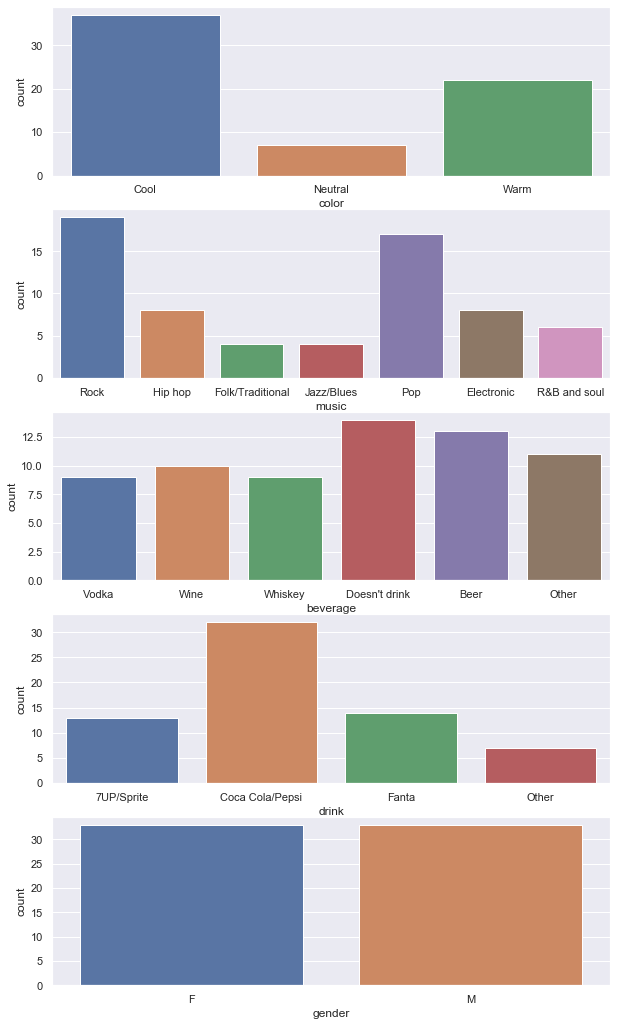

In [9]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10,18))
for i in range(len(gender_df.columns)):
    sns.countplot(data=gender_df, x=gender_df.iloc[:,i],ax=axes[i])

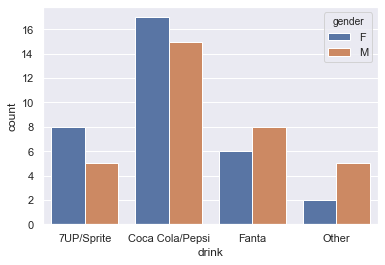

In [10]:
sns.countplot(data=gender_df, x="drink", hue="gender");

In [11]:
# Balance of the labels
gender_df["gender"].value_counts()

M    33
F    33
Name: gender, dtype: int64

In [12]:
gender_df.head()

,color,music,beverage,drink,gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [13]:
# LabelEncoder
data = gender_df
le_color = LabelEncoder()
data["color"] = le_color.fit_transform(gender_df["color"].values)
le_music = LabelEncoder()
data["music"] = le_music.fit_transform(gender_df["music"].values)
le_beverage = LabelEncoder()
data["beverage"] = le_beverage.fit_transform(gender_df["beverage"].values)
le_drink = LabelEncoder()
data["drink"] = le_drink.fit_transform(gender_df["drink"].values)
le_gender = LabelEncoder()
data["gender"] = le_gender.fit_transform(gender_df["gender"].values)

In [14]:
data.head()

,color,music,beverage,drink,gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0


## 3. Data Wrangling and Transformation.

In [15]:
# Split the data into X & y
X = data.drop("gender", axis=1)
y = data["gender"]

In [16]:
# Split X and y into train & split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Machine Learning.

**Logistic Regression**

In [17]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)

In [18]:
y_preds

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [19]:
actual_and_predicted = pd.DataFrame({'actual': y_test, 'predicted':y_preds})
actual_and_predicted.head(10)

,actual,predicted
45,1,1
28,0,1
29,0,1
55,1,1
63,1,1
31,0,0
51,1,0
46,1,0
34,1,1
4,0,0


In [20]:
# classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.78      0.64      0.70        11

    accuracy                           0.70        20
   macro avg       0.71      0.71      0.70        20
weighted avg       0.71      0.70      0.70        20



In [21]:
# confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)
print(conf_mat)

[[7 2]
 [4 7]]


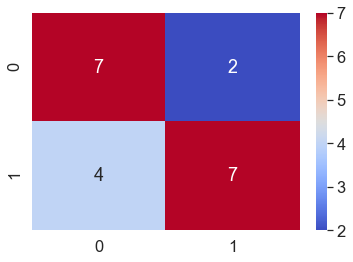

In [22]:
sns.set(font_scale=1.5)
sns.heatmap(conf_mat, annot=True, cmap='coolwarm');

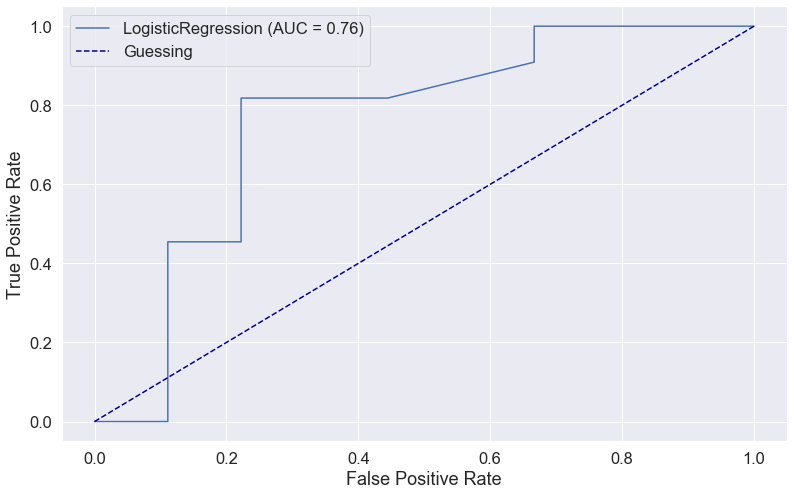

In [23]:
# Plot roc curve
fig, ax = plt.subplots(figsize=(13,8))
plot_roc_curve(clf, X_test, y_test, ax=ax);
plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
ax.legend()
plt.show()

In [24]:
# ROC-AUC score
roc_auc_score(y_test, y_preds)

0.7070707070707071

## Conclusion

* 1. The data is too small. Only 66 instances.
* 2. The classes are balanced.
* 3. Logistic Regression model was choosen. Predictions (with visual comparison) were done with an accuracy of the model equal 0.76, no hyper parameters were applied.